   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

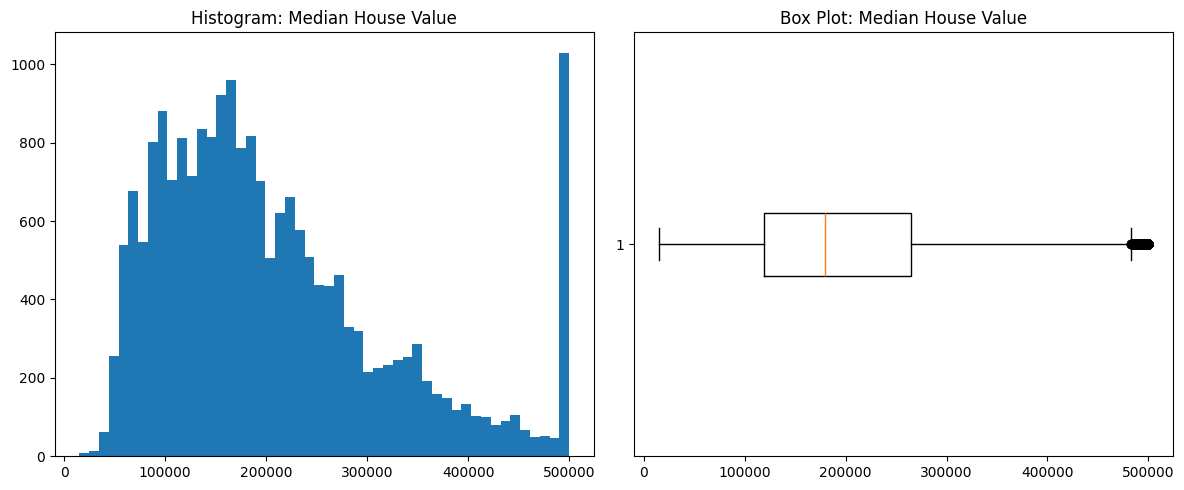


Missing values percentage per column:
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


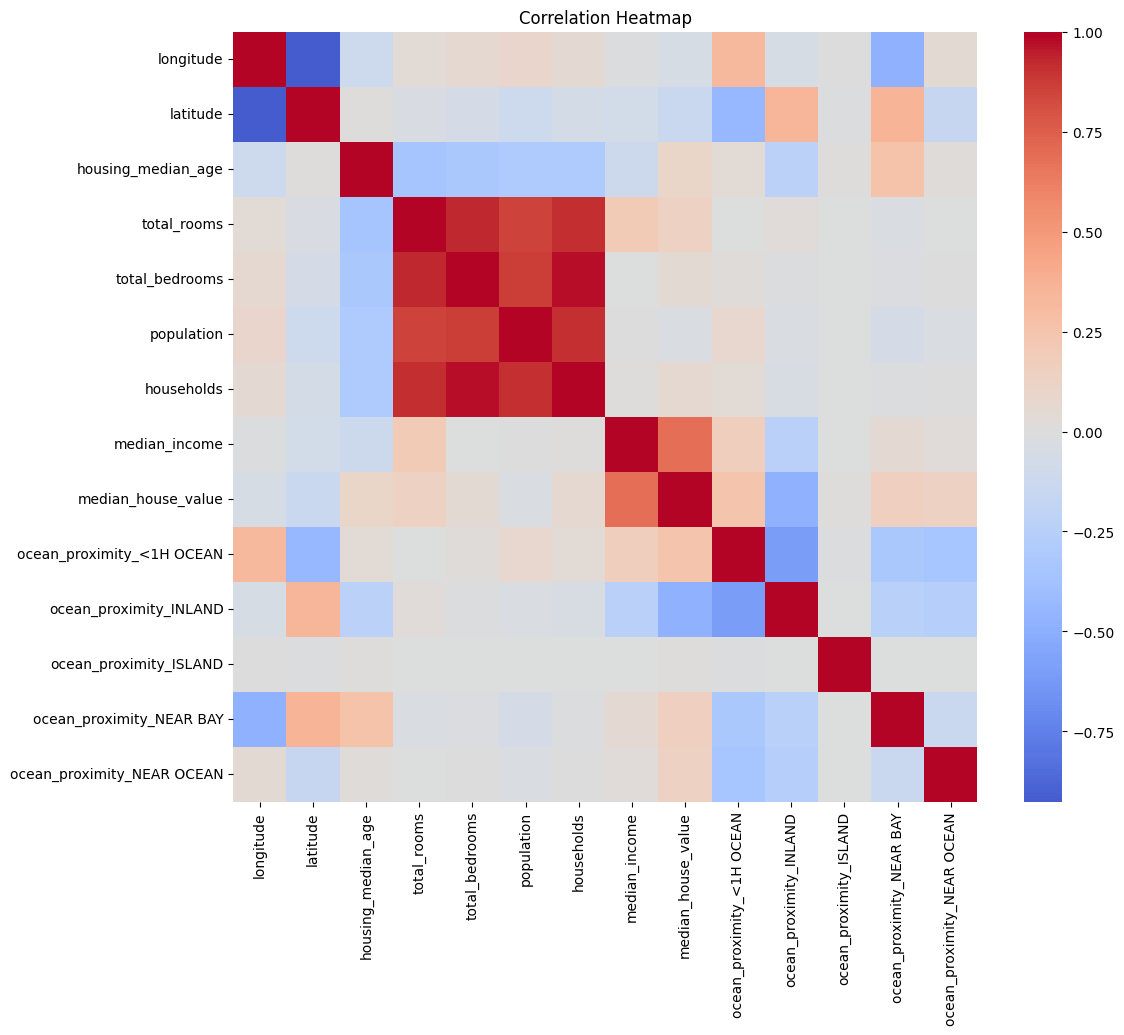

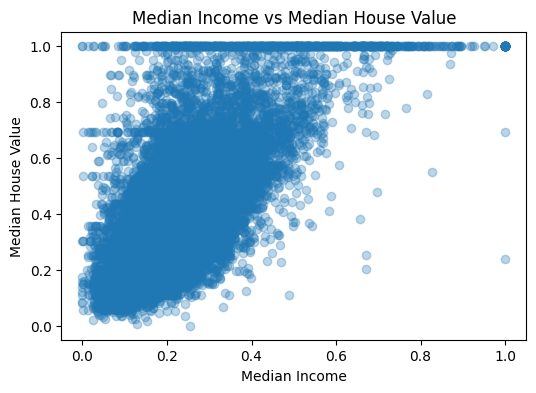


Top 3 positively correlated features:
median_income                0.689597
ocean_proximity_<1H OCEAN    0.249835
ocean_proximity_NEAR BAY     0.162165
Name: median_house_value, dtype: float64

Most negatively correlated feature:
ocean_proximity_INLAND   -0.480212
Name: median_house_value, dtype: float64

Model Evaluation Metrics:
RMSE: 0.1444977086857799
MAE: 0.10483470028006008
R2 Score: 0.6251978098498668


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

# i
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# ii
print(df.head(10))
print(df.dtypes)

# iii
print(df.describe())

# iv
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["median_house_value"], bins=50)
plt.title("Histogram: Median House Value")

plt.subplot(1, 2, 2)
plt.boxplot(df["median_house_value"], vert=False)
plt.title("Box Plot: Median House Value")

plt.tight_layout()
plt.show()

# v
missing_pct = df.isna().mean() * 100
print("\nMissing values percentage per column:")
print(missing_pct)

# vi
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# vii
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=False)

# viii
num_cols = df.select_dtypes(include=[np.number]).columns
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df[num_cols] = minmax_scaler.fit_transform(df[num_cols])

# ix
df["income_cat"] = pd.qcut(df["median_income"], q=5, labels=False)

train_strat, test_strat = train_test_split(
    df,
    test_size=0.2,
    stratify=df["income_cat"],
    random_state=42
)

train_strat = train_strat.drop(columns=["income_cat"])
test_strat = test_strat.drop(columns=["income_cat"])

# x, xi
corr_matrix = train_strat.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# xii
plt.figure(figsize=(6, 4))
plt.scatter(
    train_strat["median_income"],
    train_strat["median_house_value"],
    alpha=0.3
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

train_rand, test_rand = train_test_split(df, test_size=0.2, random_state=42)

# viii
target_corr = corr_matrix["median_house_value"].sort_values(ascending=False)

print("\nTop 3 positively correlated features:")
print(target_corr[1:4])

print("\nMost negatively correlated feature:")
print(target_corr.tail(1))

# xiv
scaler = StandardScaler()
X = train_rand.drop("median_house_value", axis=1)
y = train_rand["median_house_value"]

X_test = test_rand.drop("median_house_value", axis=1)
y_test = test_rand["median_house_value"]

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# xv
model = LinearRegression()
model.fit(X_scaled, y)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)
